In [227]:
import numpy as np
#%load_ext cudf.pandas
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

In [228]:
f1 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+38.csv')    #8 datasets for introducing faults into them
f2 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+37.csv')
f3 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+36.csv')
f4 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+35.csv')
f5 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+34.csv')
f6 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+33.csv')
f7 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+32.csv')
f8 = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+31.csv')
og = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\cooling_system.csv')

Making sure that the synthetic data meets the data ranges.

In [229]:
dsets = [f1, f2, f3, f4, f5, f6, f7, f8]
for item in dsets:
    item.drop(['Unnamed: 0', 'example_id'], axis=1, inplace=True)       #Dropping irrelevant columns created during generation
for item in dsets:
    for index,rows in item.iterrows():
        if(rows[0] < -40):
            rows[0] = -40
        elif(rows[0] > 210):
            rows[0] = 210
        if(rows[1] < 0):
            rows[1] = 0
        elif(rows[1]>100):
            rows[1] = 100
        if(rows[2] < 0):
            rows[2] = 0
        elif(rows[2] > 8031.875):
            rows[2] = 8031.875

In [230]:
og.describe()

,Unnamed: 0,65262-110,65263-111,64817-1598
count,92559.00000,92559.000000,92559.000000,92559.000000
mean,46282.00000,85.697523,49.930315,4093.787357
std,26719.62612,7.293955,1.865327,95.174507
min,3.00000,-40.000000,0.000000,0.000000
25%,23142.50000,86.000000,50.000000,4096.000000
50%,46282.00000,88.000000,50.000000,4096.000000
75%,69421.50000,90.000000,50.000000,4096.000000
max,92561.00000,94.000000,50.000000,4096.000000


In [231]:
f1.describe()

,65262-110,65263-111,64817-1598
count,92544.000000,92544.000000,92544.000000
mean,90.923547,49.801579,4095.610649
std,1.521882,0.377262,0.555098
min,82.348450,46.243210,4090.318600
25%,89.864760,49.765972,4095.458300
50%,90.818970,49.994534,4095.831000
75%,91.912704,49.999996,4095.964800
max,95.330050,50.000000,4096.000000


Plotting some graphs to compare the synthetic data to the real data

In [232]:
#Function to plot moving average graph
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

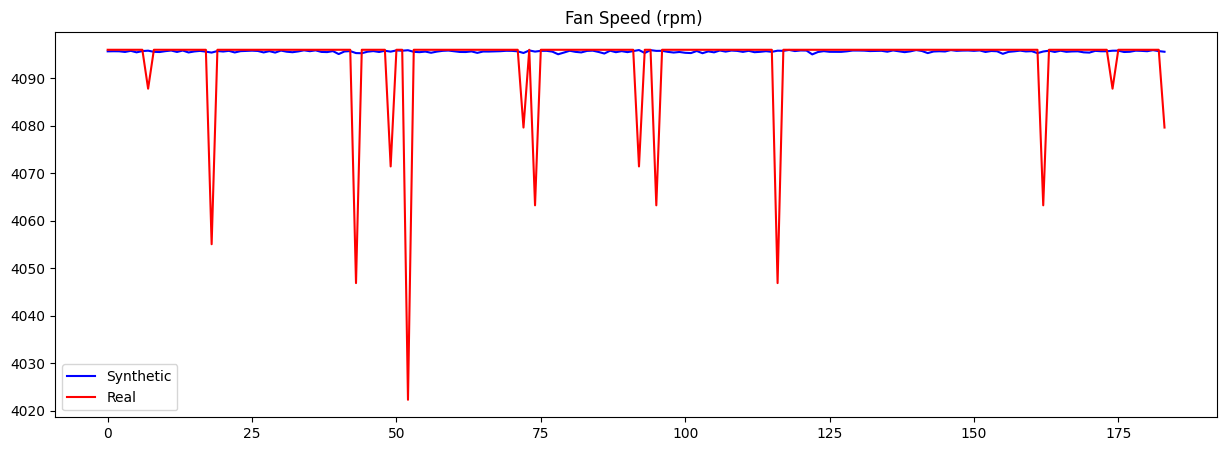

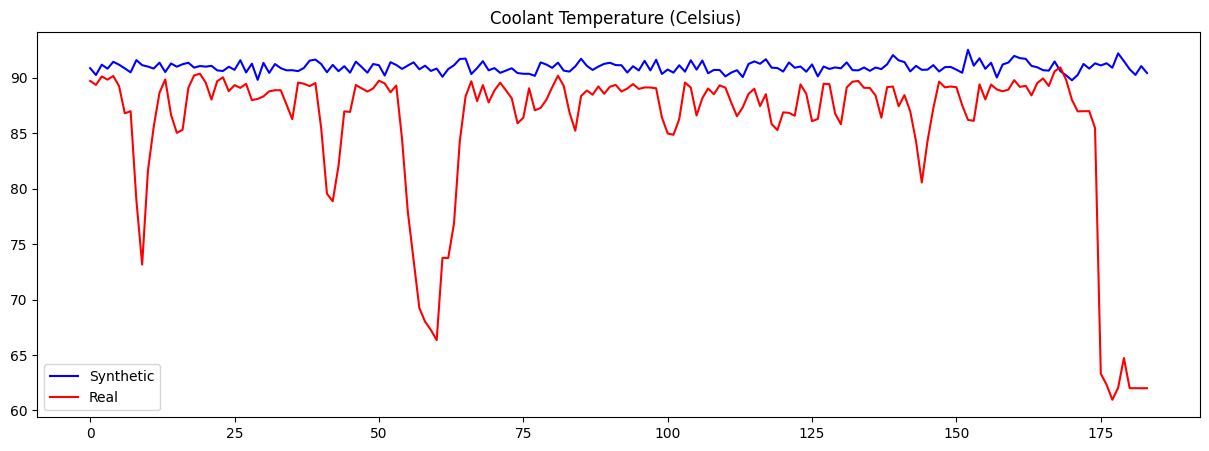

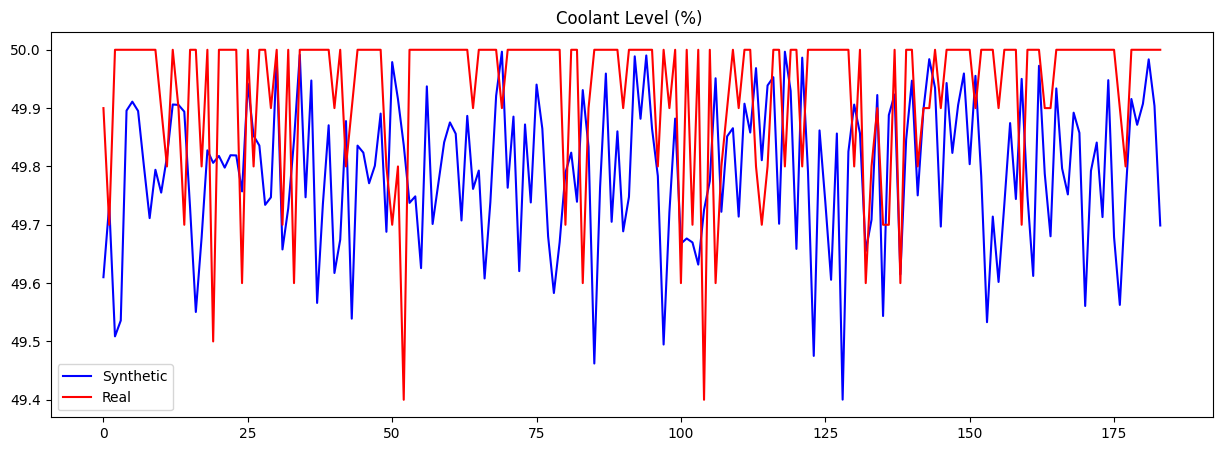

In [233]:
        w=500
        plt.figure(figsize=(15,5))
        v1 = f5['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Fan Speed (rpm) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = f5['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Coolant Temperature (Celsius) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()
        plt.figure(figsize=(15,5))
        v1 = f5['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        v2 = og['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
        plt.title('Coolant Level (%) ')
        plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
        plt.plot(np.arange(len(v1)),v2, c='r', label = 'Real')
        plt.legend()

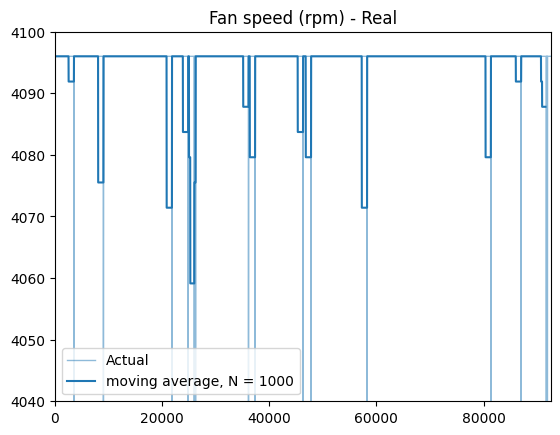

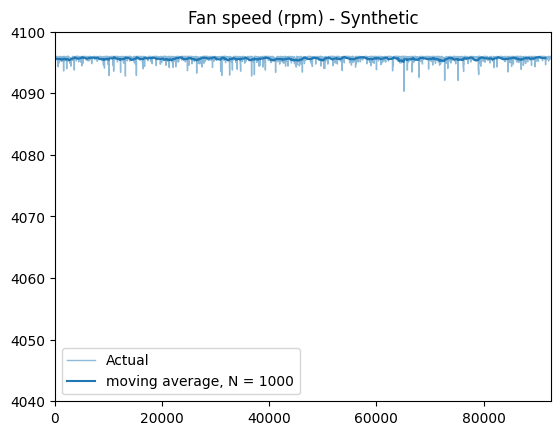

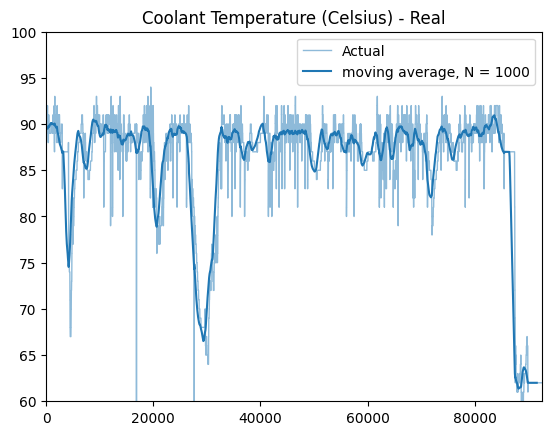

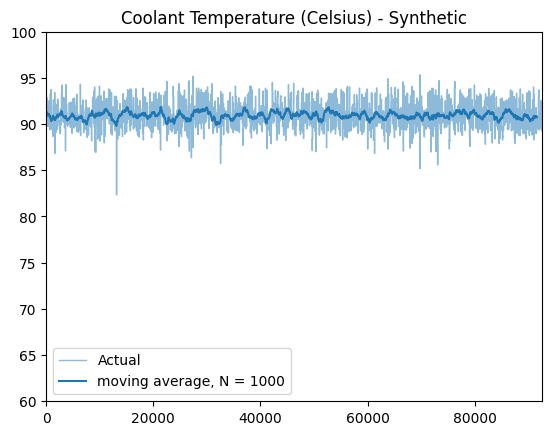

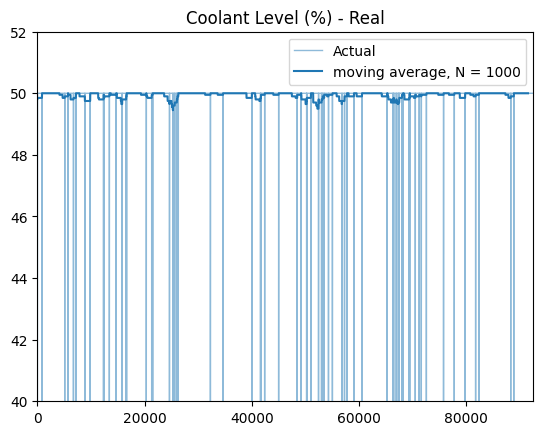

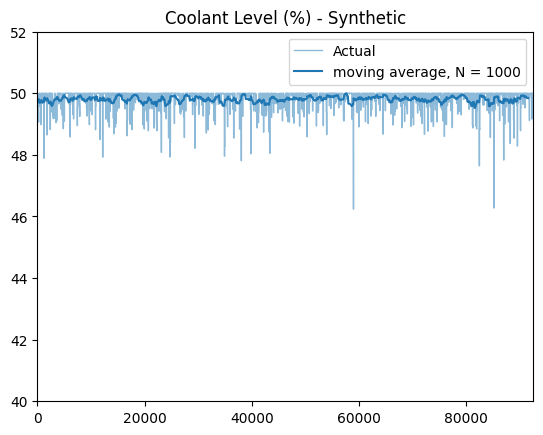

In [234]:

plt.plot(og['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['64817-1598']))
plt.ylim(4040, 4100)
plt.title('Fan speed (rpm) - Real')
plt.legend()
plt.show()
plt.plot(f1['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f1['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f1['64817-1598']))
plt.ylim(4040, 4100)
plt.title('Fan speed (rpm) - Synthetic')
plt.legend()
plt.show()
plt.plot(og['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['65262-110']))
plt.ylim(60, 100)
plt.title('Coolant Temperature (Celsius) - Real')
plt.legend()
plt.show()
plt.plot(f1['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f1['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f1['65262-110']))
plt.ylim(60, 100)
plt.title('Coolant Temperature (Celsius) - Synthetic')
plt.legend()
plt.show()
plt.plot(og['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(og['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['65263-111']))
plt.ylim(40, 52)
plt.title('Coolant Level (%) - Real')
plt.legend()
plt.show()
plt.plot(f1['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f1['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f1['65263-111']))
plt.ylim(40, 52)
plt.title('Coolant Level (%) - Synthetic')
plt.legend()
plt.show()

Changing coolant levels for robustness

In [235]:
import random
for item in dsets:
    vals = random.random()
    if(0.15 <= vals <= 0.3):
        print(id(item))
        print(vals)
        item['65263-111'] += 15
    elif(0.30 <= vals <= 0.45):
        print(id(item))
        print(vals)
        item['65263-111'] += 30

2025724906752
0.2061318122454231
2025719730336
0.15248052693596725


Below is the first type of fault introduced

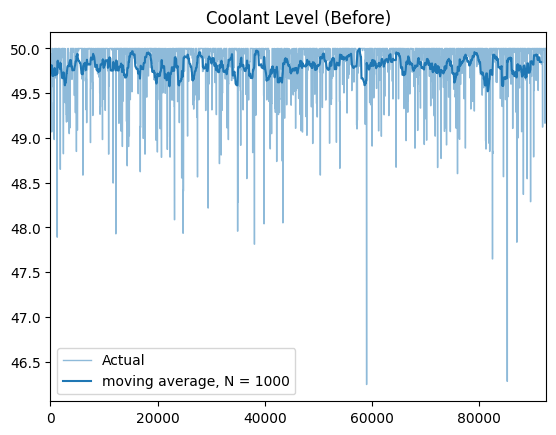

In [236]:
#Plotting the Coolant Level with faults
plt.plot(f1['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f1['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f1['65263-111']))
#plt.ylim(40, 52)
plt.title('Coolant Level (Before)')
plt.legend()
plt.show()

In [237]:
#Picking Dataset f1 and f2
'''The first fault involves lowering the coolant level by 15% or so to indicate a potential leakage in the cooling system'''
valadd = 0.15/len(f1)
val = 0
for index, row in f1.iterrows():
    val += row[1] * valadd
    if(row[1] - val >= 20):
        row[1] -= val


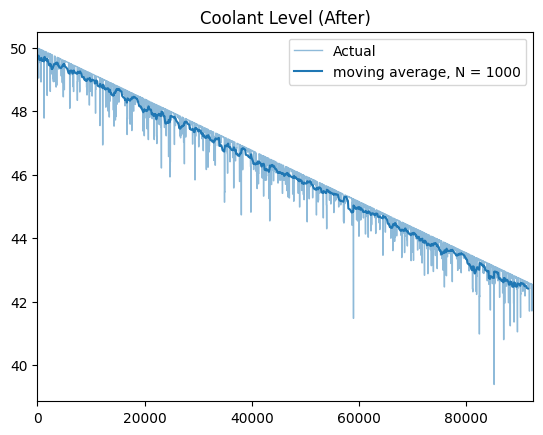

In [238]:
#Plotting the Coolant Level with faults
plt.plot(f1['65263-111'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f1['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f1['65263-111']))
#plt.ylim(30, 52)
plt.title('Coolant Level (After)')
plt.legend()
plt.show()

Below is the second type of fault

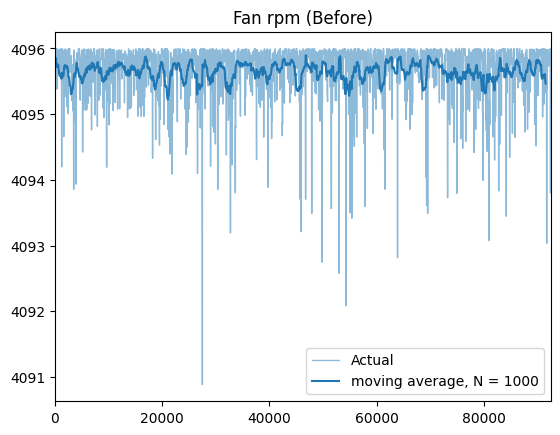

In [239]:
plt.plot(f3['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f3['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f3['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (Before)')
plt.legend()
plt.show()

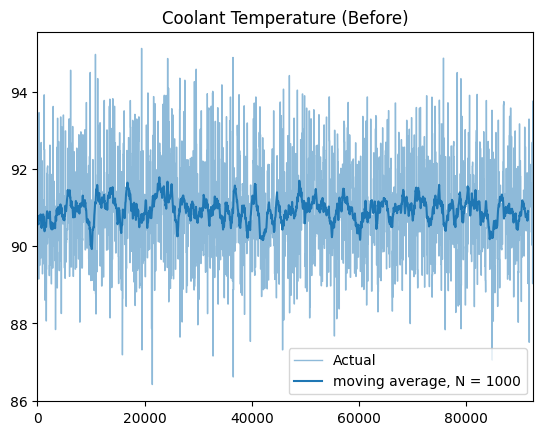

In [240]:
plt.plot(f3['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f3['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f3['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (Before)')
plt.legend()
plt.show()

In [241]:
#Picking Dataset f3 and f4
'''The second fault involves lowering the fan rpm by 30% or so and increasing the coolant temperature slightly to indicate a fan deterioration'''
valadd = 0.025/len(f3)
val = 0
for index, row in f3.iterrows():
    val += row[0] * valadd
    row[0] += val
    row[2] -= row[2] * 0.30

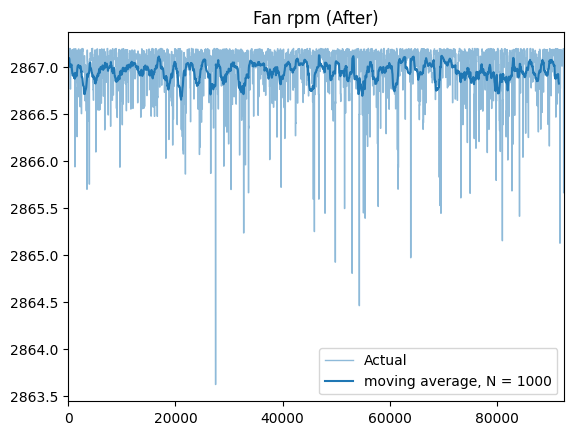

In [242]:
plt.plot(f3['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f3['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f3['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (After)')
plt.legend()
plt.show()

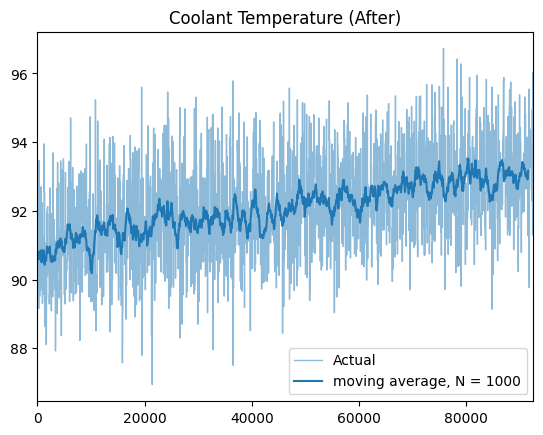

In [243]:
plt.plot(f3['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f3['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f3['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (After)')
plt.legend()
plt.show()

Below is the third fault

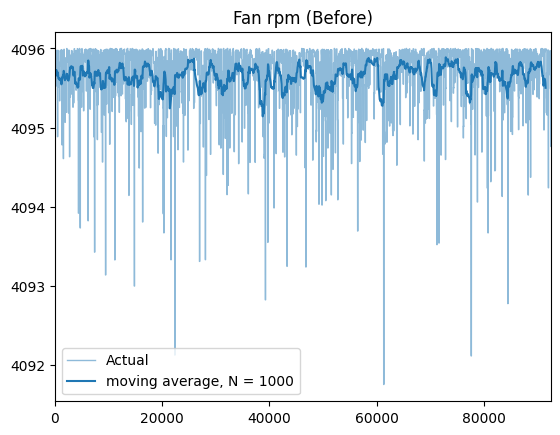

In [244]:
plt.plot(f5['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f5['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f5['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (Before)')
plt.legend()
plt.show()

In [245]:
#Picking Dataset f5 and f6
'''The second fault involves increasing the fan rpm by 15% or so to indicate a fan deterioration'''
for index, row in f5.iterrows():
    row[2] += row[2] * 0.15

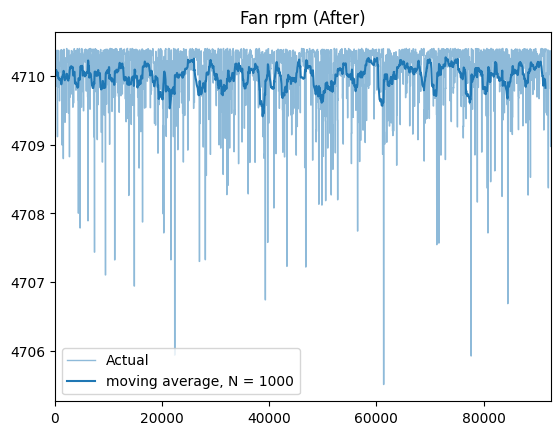

In [246]:
plt.plot(f5['64817-1598'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f5['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f5['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (After)')
plt.legend()
plt.show()

Below is the fourth type of fault introduced

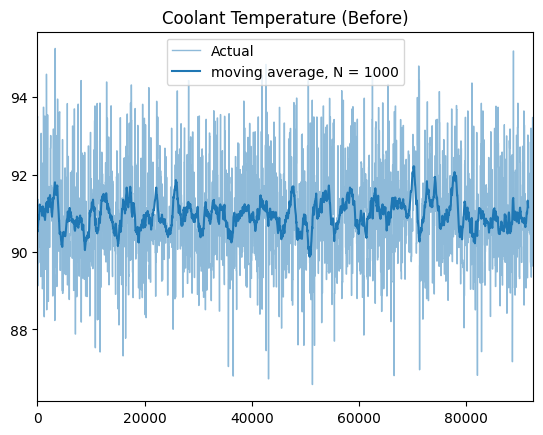

In [247]:
plt.plot(f7['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f7['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f7['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (Before)')
plt.legend()
plt.show()

In [248]:
#Picking Dataset f7 and f8
'''The second fault involves increasing the coolant temperature by 15% or so to indicate a cooling system issue'''
valadd = 0.15/len(f7)
val = 0
for index, row in f7.iterrows():
    val += row[0] * valadd
    row[0] += val

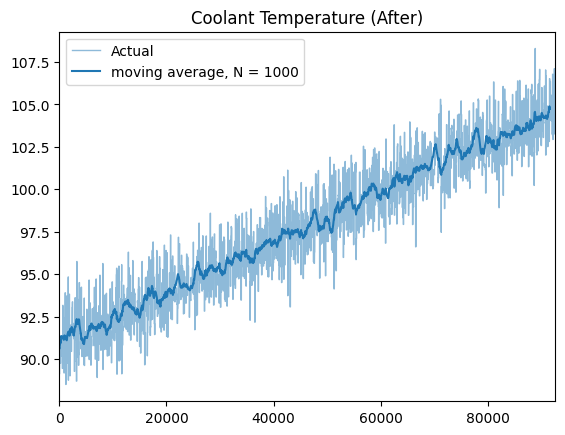

In [249]:
plt.plot(f7['65262-110'], linewidth = 1, alpha = 0.5, label = 'Actual')
plt.plot(moving_avg(f7['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(f7['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (After)')
plt.legend()
plt.show()